# Exploratory Data Analysis with Pandas Framework in Banking

Personal Project By Elvan Vensiando

Special thanks to IBM Corporation and MIT for providing free online courses in cognitiveclass.ai

Special thanks to [Moro et al., 2014] S. Moro, P. Cortez, and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014 for providing dataset publicly in https://archive.ics.uci.edu/ml/machine-learning-databases/00222/


-> Downloading data from URL

In [3]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip

--2021-09-12 09:54:00--  https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 444572 (434K) [application/x-httpd-php]
Saving to: ‘bank-additional.zip.1’

bank-additional.zip 100%[===================>] 434.15K  1.67MB/s    in 0.3s    

2021-09-12 09:54:01 (1.67 MB/s) - ‘bank-additional.zip.1’ saved [444572/444572]



-> Unzipping the data that already downloaded

In [4]:
!unzip -o -q bank-additional.zip

-> Importing the libraries that needed as an analytical tool

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
plt.rcParams["figure.figsize"] = (8, 6)

import warnings
warnings.filterwarnings('ignore')

-> Formatting a default precision 6 decimal into 2 decimal 

In [7]:
pd.set_option("precision", 2)
pd.options.display.float_format = '{:.2f}'.format

-> Data exploration by read and look 5 first rows using "head"

In [8]:
df = pd.read_csv('bank-additional/bank-additional-full.csv', sep = ';')
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no


-> Let's look how many (rows, collumns)

In [10]:
df.shape

(41188, 21)

-> Let's look at the entire of fields name

In [11]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

Description:

Input features (column names):

age - client's age in years (numeric)
job - type of job (categorical: admin., blue-collar, entrepreneur, housemaid, management, retired, self-employed, services, student, technician, unemployed, unknown)
marital - marital status (categorical: divorced, married, single, unknown)
education - client's education (categorical: basic.4y, basic.6y, basic.9y, high.school, illiterate, professional.course, university.degree, unknown)
default - has credit in default? (categorical: no, yes, unknown)
housing - has housing loan? (categorical: no, yes, unknown)
loan - has personal loan? (categorical: no, yes, unknown)
contact - contact communication type (categorical: cellular, telephone)
month - last contact month of the year (categorical: jan, feb, mar, ..., nov, dec)
day_of_week - last contact day of the week (categorical: mon, tue, wed, thu, fri)
duration - last contact duration, in seconds (numeric).
campaign - number of contacts performed and for this client during this campaign (numeric, includes the last contact)
pdays - number of days that have passed after the client was last contacted from the previous campaign (numeric; 999 means the client has not been previously contacted)
previous - number of contacts performed for this client before this campaign (numeric)
poutcome - outcome of the previous marketing campaign (categorical: failure, nonexistent, success)
emp.var.rate - employment variation rate, quarterly indicator (numeric)
cons.price.idx - consumer price index, monthly indicator (numeric)
cons.conf.idx - consumer confidence index, monthly indicator (numeric)
euribor3m - euribor 3 month rate, daily indicator (numeric)
nr.employed - number of employees, quarterly indicator (numeric)

Output feature (desired target):

y - has the client subscribed a term deposit? (binary: yes,no)

-> Let's look general information

In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

-> Let's see the statistical characteristics

In [14]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00
mean,40.02,258.29,2.57,962.48,0.17,0.08,93.58,-40.50,3.62,5167.04
std,10.42,259.28,2.77,186.91,0.49,1.57,0.58,4.63,1.73,72.25
min,17.00,0.00,1.00,0.00,0.00,-3.40,92.20,-50.80,0.63,4963.60
25%,32.00,102.00,1.00,999.00,0.00,-1.80,93.08,-42.70,1.34,5099.10
50%,38.00,180.00,2.00,999.00,0.00,1.10,93.75,-41.80,4.86,5191.00
75%,47.00,319.00,3.00,999.00,0.00,1.40,93.99,-36.40,4.96,5228.10
max,98.00,4918.00,56.00,999.00,7.00,1.40,94.77,-26.90,5.04,5228.10


-> Let's see the non statistical numerical 

In [15]:
df.describe(include = ["object"])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


-> Let's see the target distribution(y)

In [16]:
df["y"].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

-> Let's see at the client distribution by the variable marital. Specify the value of the normalize = True parameter to view relative frequencies, but not absolute.

In [17]:
df["marital"].value_counts(normalize = True)

married    0.61
single     0.28
divorced   0.11
unknown    0.00
Name: marital, dtype: float64

-> sorting the data by a few feature values. In our case, for example, by duration (ascending = False for sorting in descending order)

In [18]:
df.sort_values(by = "duration", ascending = False).head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
24091,33,technician,single,professional.course,no,yes,no,telephone,nov,mon,...,1,999,0,nonexistent,-0.10,93.20,-42.00,4.41,5195.80,no
22192,52,blue-collar,married,basic.4y,no,no,no,telephone,aug,thu,...,3,999,0,nonexistent,1.40,93.44,-36.10,4.96,5228.10,yes
40537,27,admin.,single,high.school,no,no,no,telephone,aug,fri,...,1,999,0,nonexistent,-1.70,94.03,-38.30,0.89,4991.60,no
13820,31,technician,married,professional.course,no,no,no,cellular,jul,thu,...,1,999,0,nonexistent,1.40,93.92,-42.70,4.96,5228.10,yes
7727,37,unemployed,married,professional.course,no,yes,no,telephone,may,fri,...,2,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,yes


-> Sorting the data by the column group:

In [19]:
df.sort_values(by = ["age", "duration"], ascending = [True, False]).head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
38274,17,student,single,unknown,no,no,yes,cellular,oct,tue,...,1,2,2,success,-3.40,92.43,-26.90,0.74,5017.50,yes
37579,17,student,single,basic.9y,no,unknown,unknown,cellular,aug,fri,...,2,999,1,failure,-2.90,92.20,-31.40,0.87,5076.20,yes
37140,17,student,single,unknown,no,yes,no,cellular,aug,wed,...,3,4,2,success,-2.90,92.20,-31.40,0.88,5076.20,no
37539,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,...,2,999,2,failure,-2.90,92.20,-31.40,0.87,5076.20,no
37558,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,...,3,4,2,success,-2.90,92.20,-31.40,0.87,5076.20,no


-> The apply method can also be used to apply the function to each row. In this case(in the bellow) maximum value

In [20]:
df.apply(np.max)

age                      98
job                 unknown
marital             unknown
education           unknown
default                 yes
housing                 yes
loan                    yes
contact           telephone
month                   sep
day_of_week             wed
duration               4918
campaign                 56
pdays                   999
previous                  7
poutcome            success
emp.var.rate           1.40
cons.price.idx        94.77
cons.conf.idx        -26.90
euribor3m              5.04
nr.employed         5228.10
y                       yes
dtype: object

-> The map can also be used for the values ​​replacement in a column by passing it as an argument dictionary in form of {old_value: new_value} .

In [21]:
d = {"no": 0, "yes": 1}
df["y"] = df["y"].map(d)

-> A Data Frame can be indexed in many ways. In this regard, consider various ways of indexing and extracting data from the DataFrame with simple relevant question examples.

1. What is the share of clients attracted in our DataFrame?

In [22]:
print("Share of attracted clients =", '{:.1%}'.format(df["y"].mean()))

Share of attracted clients = 11.3%


2. What are the mean values ​​of numerical features among the attracted clients?

In [23]:
df[df["y"] == 1].mean()

age                40.91
duration          553.19
campaign            2.05
pdays             792.04
previous            0.49
emp.var.rate       -1.23
cons.price.idx     93.35
cons.conf.idx     -39.79
euribor3m           2.12
nr.employed      5095.12
y                   1.00
dtype: float64

3. What is the average call duration for the attracted clients?

In [24]:
acd = round(df[df["y"] == 1]["duration"].mean(),2)
acd_in_min = acd // 60
print("Average call duration for attracted clients =", acd_in_min, "min", int(acd) % 60, "sec")

Average call duration for attracted clients = 9.0 min 13 sec


4. What is the average age of attracted (y == 1) and unmarried ('marital' == 'single') clients?

In [25]:
print("Average age of attracted clients =", int(df[(df["y"] == 1) & (df["marital"] == "single")]["age"].mean()), "years")

Average age of attracted clients = 31 years


-> If we need to get the first or last line of the DataFrame, we can use the code df[:1] or df[-1:]:

In [26]:
df[-1:]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.10,94.77,-50.80,1.03,4963.60,0


-> Suppose we want to see how observations in our sample are distributed in the context of two features - y and marital. To do this, we can build cross tabulation by the crosstab method

In [27]:
pd.crosstab(df["y"], df["marital"])

marital,divorced,married,single,unknown
y,,,,
0,4136,22396,9948,68
1,476,2532,1620,12


In [28]:
pd.crosstab(df["y"],
            df["marital"],
            normalize = 'index')

marital,divorced,married,single,unknown
y,,,,
0,0.11,0.61,0.27,0.00
1,0.10,0.55,0.35,0.00


We see from the above that more than half of the clients (61%, column married) are married and have not issued a deposit.

In Pandas, pivot tables are implemented by the method pivot_table with such parameters:

values – a list of variables to calculate the necessary statistics,
index – a list of variables to group data,
aggfunc — values that we actually need to count by groups - the amount, average, maximum, minimum or something else.

-> Let's find the average age and the call duration for different types of client employment job

In [29]:
df.pivot_table(
    ["age", "duration"], ##columns
    ["job"], ##rows
    aggfunc = "mean",
).head(10)

,age,duration
job,,
admin.,38.19,254.31
blue-collar,39.56,264.54
entrepreneur,41.72,263.27
housemaid,45.50,250.45
management,42.36,257.06
retired,62.03,273.71
self-employed,39.95,264.14
services,37.93,258.40
student,25.89,283.68


-> Method scatter_matrix allows you to visualize the pairwise dependencies between the features (as well as the distribution of each feature on the diagonal). We will do it for numerical features.

ModuleNotFoundError: No module named 'scipy'

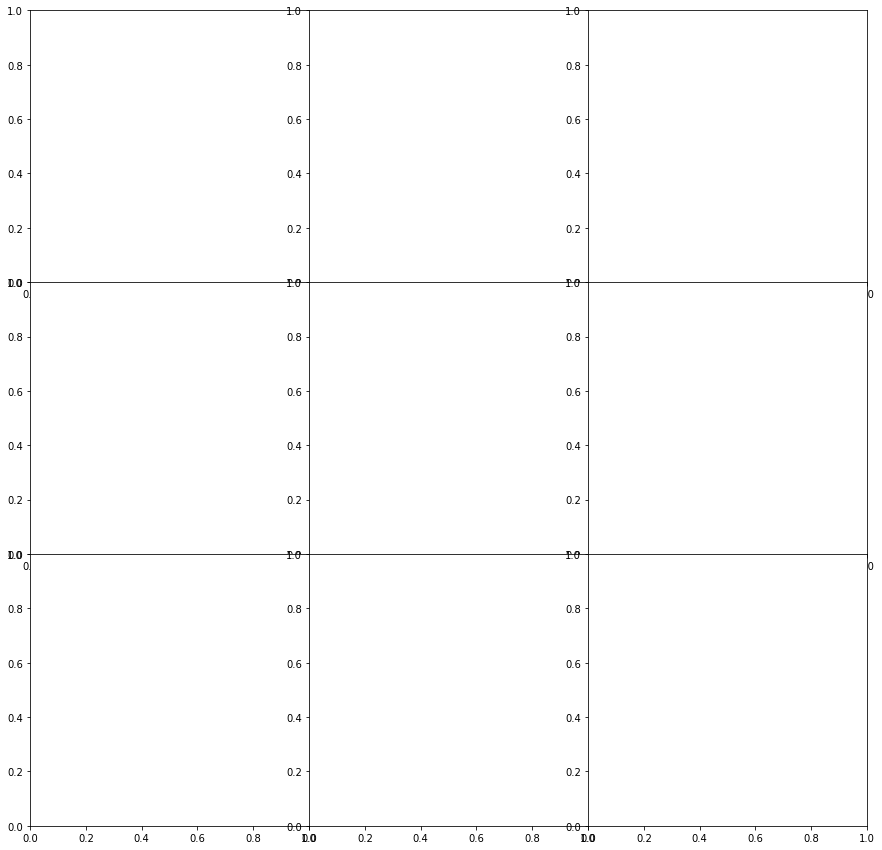

In [30]:
pd.plotting.scatter_matrix(
    df[["age", "duration", "campaign"]],
    figsize = (15, 15),
    diagonal = "kde")
plt.show()